In [1]:
pwd

'/home/wsuser/work'

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_dc77182cf0264d15b5aa1af55a17a4bf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='I_JQfvV3aEzb5VV9yNv_mngnWBxWRAsYBH--bBUd3e69',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_dc77182cf0264d15b5aa1af55a17a4bf.get_object(Bucket='ibmguidedproject-donotdelete-pr-bhascff0dhlkjc', Key='Dataset Plant Disease.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile 
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
ls

'Dataset Plant Disease'/


In [6]:
pwd

'/home/wsuser/work'

# Image Augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
ls

'Dataset Plant Disease'/


In [10]:
pwd

'/home/wsuser/work'

In [11]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size = (128,128),batch_size=16,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size = (128,128),batch_size=16,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [12]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [14]:
model = Sequential()

In [15]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

# Hidden Layers

In [18]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))

# Output Layer

In [19]:
model.add(Dense(9,activation = 'softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [22]:
model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)

/tmp/wsuser/ipykernel_165/174847055.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)


Epoch 1/20
89/89 [==============================] - 45s 498ms/step - loss: 2.3718 - accuracy: 0.2556 - val_loss: 1.9499 - val_accuracy: 0.3194
Epoch 2/20
89/89 [==============================] - 43s 484ms/step - loss: 1.5290 - accuracy: 0.4642 - val_loss: 1.3109 - val_accuracy: 0.5208
Epoch 3/20
89/89 [==============================] - 44s 490ms/step - loss: 1.2683 - accuracy: 0.5611 - val_loss: 1.2779 - val_accuracy: 0.5347
Epoch 4/20
89/89 [==============================] - 44s 490ms/step - loss: 1.0956 - accuracy: 0.6124 - val_loss: 0.8824 - val_accuracy: 0.6898
Epoch 5/20
89/89 [==============================] - 44s 493ms/step - loss: 0.8873 - accuracy: 0.6854 - val_loss: 0.9764 - val_accuracy: 0.6458
Epoch 6/20
89/89 [==============================] - 44s 496ms/step - loss: 0.9705 - accuracy: 0.6412 - val_loss: 0.8057 - val_accuracy: 0.7106
Epoch 7/20
89/89 [==============================] - 44s 491ms/step - loss: 0.7540 - accuracy: 0.7289 - val_loss: 0.7504 - val_accuracy: 0.7176

In [23]:
model.save("vegetable.h5")

In [24]:
ls

'Dataset Plant Disease'/   vegetable.h5


# Testing The Model

In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
#Load the model

model =load_model("vegetable.h5")

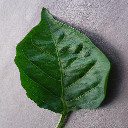

In [27]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0a3f2927-4410-46a3-bfda-5f4769a5aaf8___JR_HL 8275.JPG",target_size=(128,128))
img

In [28]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

'Tomato___Septoria_leaf_spot'

# IBM Deployment

In [29]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 11.7 MB/s eta 0:00:01


In [30]:
from ibm_watson_machine_learning import APIClient
wml_credentials= {
                    "url" : "https://us-south.ml.cloud.ibm.com",
                    "apikey" : "rVZ9XVrP4Yqdol692nMxeMROnI1-w5DQoXNtRBH2-FOk"
                }

In [31]:
client = APIClient(wml_credentials)

In [32]:
client

In [33]:
def guid_from_space_name(client,Vegetable_Deploy):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == Vegetable_Deploy)['metadata']['id'])

In [34]:
space_uid = guid_from_space_name(client,'Vegetable_Deploy')
print("space UID = " + space_uid)

space UID = 5341a1ca-2400-408a-807b-595df92c8678


In [35]:
client.set.default_space(space_uid)

'SUCCESS'

In [36]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [37]:
#tensorflow_1.15-py3.6
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [38]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [39]:
ls

'Dataset Plant Disease'/   vegetable.h5


In [40]:
!tar -zcvf vegetable-training.tgz vegetable.h5

vegetable.h5


In [41]:
ls

'Dataset Plant Disease'/   vegetable.h5   vegetable-training.tgz


In [42]:
model_details = client.repository.store_model(model= 'vegetable-training.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )

In [43]:
model_id = client.repository.get_model_id(model_details)

In [44]:
model_id

'bc646b08-5066-401a-9b25-df0c852c16b9'

In [45]:
client.repository.download(model_id,'vegetable.tar.gb')

Successfully saved model content to file: 'vegetable.tar.gb'


'/home/wsuser/work/vegetable.tar.gb'